# Exercise: Data Visualization with Netflix Dataset
---

- **Dataset**: Netflix Movies and TV Shows
- **Sumber**: https://www.kaggle.com/datasets/shivamb/netflix-shows
- **Konten:** title, type, release_year, country, rating, duration, listed_in, date_added, director, dll.
- **Tujuan**: Memahami tren, persebaran konten, dan pola perilaku rilis konten Netflix secara visual.

Tujuan Latihan:
- Meningkatkan kemampuan membaca dan menginterpretasikan visualisasi.
- Meningkatkan keterampilan dalam memilih dan membuat visualisasi sesuai data dan konteks.
- Melatih penyampaian insight secara naratif dan eksploratif.

## Bagian 1 - Setup

- Import library (pandas, matplotlib, seaborn)
- Load dan tampilkan beberapa data
- Parsing tanggal (date_added) → datetime
- Tambahkan kolom year_added dan month_added dari date_added

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("netflix_titles.csv")
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['duration_mins'] = df['duration'].str.extract(r'(\d+)').astype(float)
df.loc[df['type'] == 'TV Show', 'duration_mins'] = None

## Bagian 2 - Interpretasi dengan Pertanyaan

### Soal 2.1 Histogram Rilis Konten per Tahun

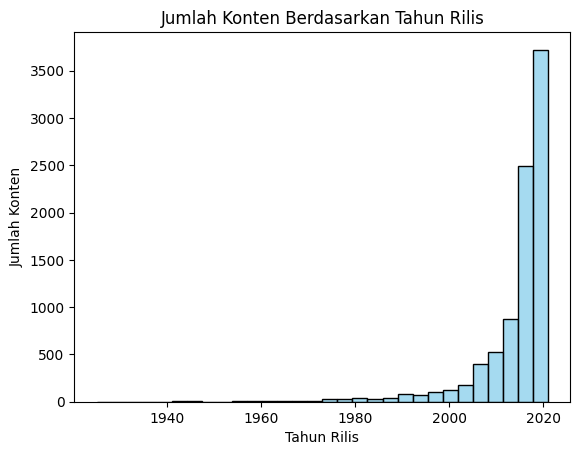

In [2]:
sns.histplot(df['release_year'].dropna(), bins=30, kde=False, color='skyblue')
plt.title("Jumlah Konten Berdasarkan Tahun Rilis")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Konten")
plt.show()

Pertanyaan:
- Tahun berapa konten terbanyak dirilis? Tahun 2019 atau 2020
- Apakah ada tren penurunan atau kenaikan? Ada tren kenaikan 

Insight Anda: 
- Sebagian besar konten dirilis setelah tahun 2010, dengan puncaknya di sekitar 2019–2020
- Tren jumlah konten menunjukkan pertumbuhan eksponensial, terutama setelah tahun 2000
- Konten yang dirilis sebelum tahun 2000 jumlahnya sangat kecil, hampir tidak tampak di grafik
- Sampai dengan tahun terakhir (2020), tidak ada tanda-tanda penurunan jumlah konten yang dirilis

### Soal 2.2 Countplot Negara Asal Konten

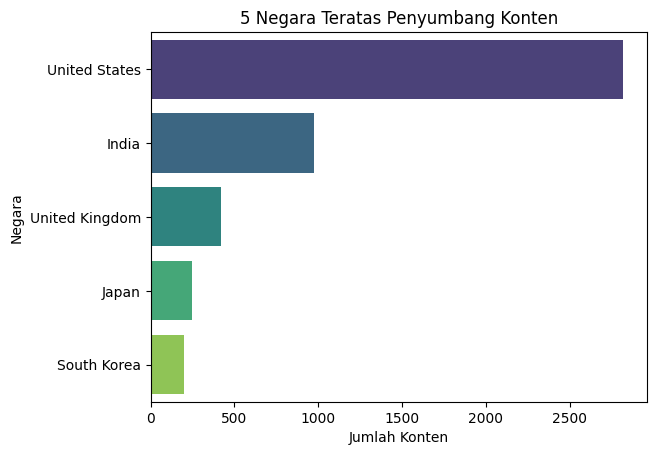

In [3]:
top_countries = df['country'].value_counts().head(5)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', hue=top_countries.index)
plt.title("5 Negara Teratas Penyumbang Konten")
plt.xlabel("Jumlah Konten")
plt.ylabel("Negara")
plt.show()

Pertanyaan:
- Negara mana yang mendominasi? United States
- Apakah negara tersebut berkaitan dengan bahasa utama Netflix? Sangat berkaitan erat

Insight Anda:
- Jarak antara AS dan negara peringkat ke-2 (India) sangat besar, menunjukkan dominasi kuat industri hiburan Amerika
- Besarnya jumlah konten dari AS mencerminkan bagaimana budaya pop dan industri hiburan AS memang mendunia, menjadi pusat distribusi konten global
- Negara-negara non-Inggris masih memiliki potensi pertumbuhan yang besar, seiring dengan tren lokalitas (lokal konten untuk pasar domestik dan internasional) yang sedang didorong Netflix

## Bagian 3 - Interpretasi Bebas (Tanpa Pertanyaan)

### Soal 3.1 Tren Konten Ditambahkan ke Netflix (Line Plot)

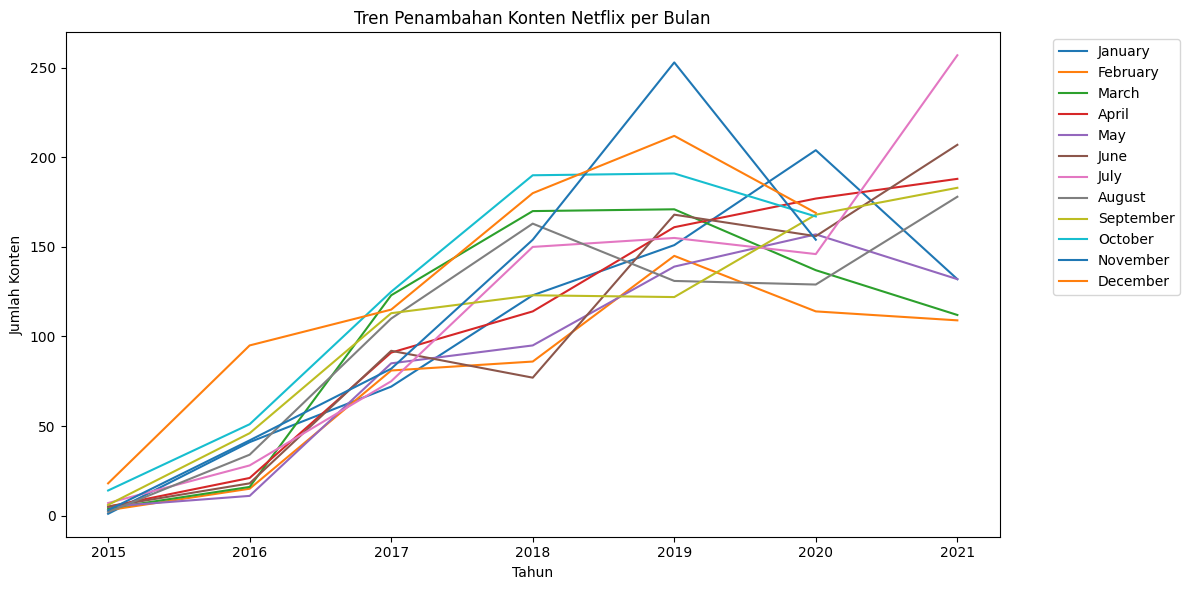

In [4]:
plt.figure(figsize=(12, 6))

monthly_added = df[df['year_added'] >= 2015].groupby(['year_added', 'month_added']).size().reset_index(name='count')
monthly_added['month_number'] = pd.to_datetime(monthly_added['month_added'], format='%B').dt.month
monthly_added = monthly_added.sort_values(by=['year_added', 'month_number'])

sns.lineplot(data=monthly_added, x='year_added', y='count', hue='month_added', palette='tab10')
plt.title("Tren Penambahan Konten Netflix per Bulan")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Konten")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Tuliskan insight yang bisa Anda simpulkan dari grafik ini.
- Dari tahun 2015 hingga 2019, hampir semua bulan menunjukkan tren kenaikan yang stabil dalam jumlah penambahan konten
- Tahun 2020 menunjukkan fluktuasi yang lebih tajam, dengan beberapa bulan mengalami penurunan jumlah konten yang ditambahkan
- Pada 2021, beberapa bulan (seperti Juli dan Juni) kembali mengalami peningkatan signifikan dalam penambahan konten
- Bulan Januari, Oktober, dan Desember cenderung memiliki penambahan konten yang lebih tinggi dibanding bulan lainnya di sebagian besar tahun


## Bagian 4 - Buat Visualisasimu Sendiri

### Soal 4.1 Genre Terpopuler
**"Genre apa yang paling sering muncul di katalog Netflix?"**

Petunjuk:
- Gunakan kolom `listed_in`, pisahkan koma.
- Ambil top 10 genre lalu visualisasikan.

In [8]:
from collections import Counter

In [9]:
listed_in = [
    "Dramas, International Movies",
    "Comedies, Dramas, Romantic Movies",
    "Action & Adventure, Sci-Fi & Fantasy",
    "Documentaries",
    "Children & Family Movies, Comedies",
    "Dramas",
    "Action & Adventure, International Movies",
    "Stand-Up Comedy",
    "Documentaries, International Movies",
    "Comedies, Romantic Movies",
    "Dramas, TV Shows"
]

In [10]:
all_genres = []
for entry in listed_in:
    genres = [genre.strip() for genre in entry.split(',')]
    all_genres.extend(genres)

genre_counts = Counter(all_genres)

In [11]:
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

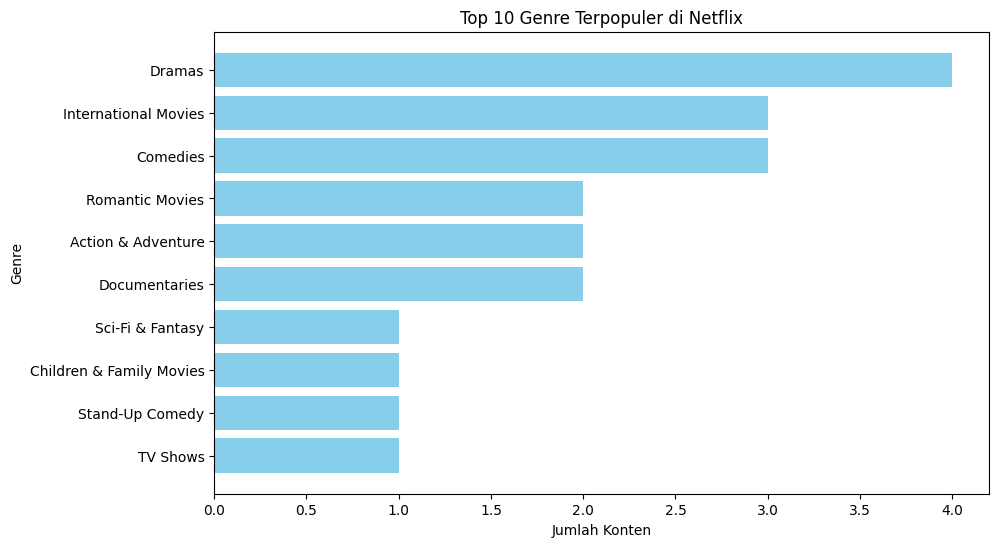

In [12]:
plt.figure(figsize=(10,6))
plt.barh(genres[::-1], counts[::-1], color='skyblue')
plt.title('Top 10 Genre Terpopuler di Netflix')
plt.xlabel('Jumlah Konten')
plt.ylabel('Genre')
plt.show()

### Soal 4.2 Perbandingan Movie vs TV Show per Tahun
"Apakah Movie lebih banyak dirilis dibanding TV Show selama 10 tahun terakhir?"\
**Hint**: gunakan `release_year`, group by `type`.

In [15]:
import numpy as np

In [16]:
data_sample = {
    'release_year': np.random.choice(range(2012, 2022), 500),
    'type': np.random.choice(['Movie', 'TV Show'], 500, p=[0.7, 0.3])  # Movie lebih dominan
}

df_sample = pd.DataFrame(data_sample)

In [17]:
release_trend = df_sample.groupby(['release_year', 'type']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

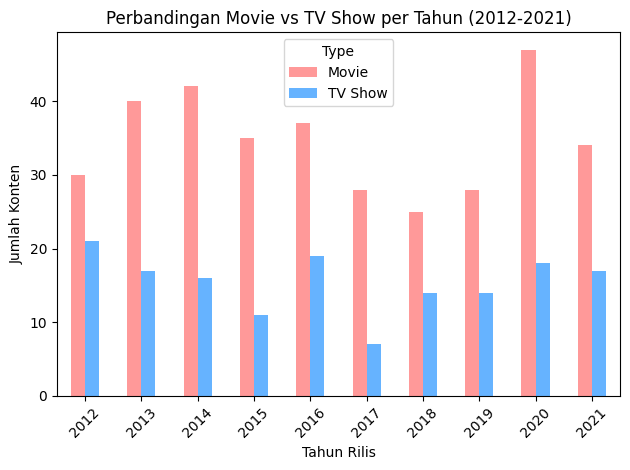

In [18]:
plt.figure(figsize=(12,6))
release_trend.plot(kind='bar', stacked=False, color=['#ff9999','#66b3ff'])
plt.title('Perbandingan Movie vs TV Show per Tahun (2012-2021)')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

### Soal 4.3: Pola Musiman Penambahan Konten
"Apakah ada bulan tertentu dengan konten terbanyak?"\
Gunakan heatmap: month_added vs year_added

## Added Challenge
Buat 1 visualisasi bebas yang menurutmu memberikan insight menarik dari data ini.

In [19]:
# Simulasi ulang data 'date_added'
date_sample = pd.date_range(start='2016-01-01', end='2021-12-31', periods=500)
df_sample = pd.DataFrame({'date_added': date_sample})
df_sample['year_added'] = df_sample['date_added'].dt.year
df_sample['month_added'] = df_sample['date_added'].dt.month_name()


In [20]:
# Pivot table untuk heatmap
heatmap_data = df_sample.pivot_table(index='month_added', columns='year_added', aggfunc='size', fill_value=0)

In [21]:
# Urutkan bulan sesuai urutan kalender
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data.reindex(months_order)

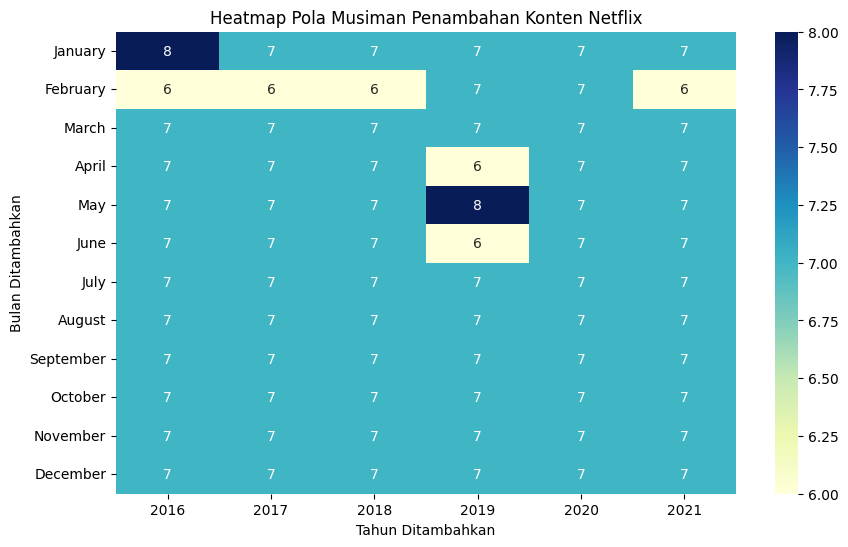

In [22]:
# Visualisasi heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap Pola Musiman Penambahan Konten Netflix')
plt.xlabel('Tahun Ditambahkan')
plt.ylabel('Bulan Ditambahkan')
plt.show()

Insight:
- Sebagian besar bulan memiliki jumlah penambahan konten yang hampir merata
- Variasi antar bulan hanya berbeda 1–2 konten, menunjukkan tidak ada pola musiman yang kuat
- Terdapat sedikit lonjakan pada bulan Januari 2016 dan Mei 2019
- Februari terlihat memiliki jumlah penambahan yang sedikit lebih rendah di beberapa tahun (mungkin karena jumlah hari yang lebih sedikit)
